In [1]:
import ROOT

Welcome to JupyROOT 6.08/06


In [2]:
f = ROOT.TFile("qcdpy8_flat_pdf4lhc15.root")

In [3]:
f.ls()

TFile**		qcdpy8_flat_pdf4lhc15.root	
 TFile*		qcdpy8_flat_pdf4lhc15.root	
  KEY: TTree	TreeEXOVV;1	TreeEXOVV


In [4]:
t = f.Get("TreeEXOVV")

In [5]:

t.Draw("GenJetMassSoftDrop >> pdf4lhc(20,0,400)", "(GenJetPt > 550 && GenJetPt < 650) * PDF4LHC15weight_Central")
t.Draw("GenJetMassSoftDrop >> pdf4lhc_up(20,0,400)", "(GenJetPt > 550 && GenJetPt < 650) * PDF4LHC15weight_CorrUp")
t.Draw("GenJetMassSoftDrop >> cteq(20,0,400)", "(GenJetPt > 550 && GenJetPt < 650) * CTEQweight_Central")
t.Draw("GenJetMassSoftDrop >> mstw(20,0,400)", "(GenJetPt > 550 && GenJetPt < 650) * MSTWweight_Central")
t.Draw("GenJetMassSoftDrop >> nnpdf(20,0,400)", "(GenJetPt > 550 && GenJetPt < 650) * NNPDF3weight_Central")
t.Draw("GenJetMassSoftDrop >> nnpdf_up(20,0,400)", "(GenJetPt > 550 && GenJetPt < 650) * NNPDF3weight_CorrUp")


684168L

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [15]:

c1 = ROOT.TCanvas("c1", "c1")

pdf4lhc = ROOT.gDirectory.Get("pdf4lhc").Clone("pdf4lhc_working")
pdf4lhc_up = ROOT.gDirectory.Get("pdf4lhc_up").Clone("pdf4lhc_up_working")
cteq = ROOT.gDirectory.Get("cteq").Clone("cteq_working")
mstw = ROOT.gDirectory.Get("mstw").Clone("mstw_working")
nnpdf = ROOT.gDirectory.Get("nnpdf").Clone("nnpdf_working")
nnpdf_up = ROOT.gDirectory.Get("nnpdf_up").Clone("nnpdf_up_working")



for ibin in xrange( 1, pdf4lhc.GetNbinsX()) :
    xval = pdf4lhc.GetXaxis().GetBinLowEdge(ibin)
    nnpdf_val = nnpdf.GetBinContent(ibin)
    nnpdf_valup = nnpdf_up.GetBinContent(ibin)
    pdf4lhc_val = pdf4lhc.GetBinContent(ibin)
    pdf4lhc_valup = pdf4lhc_up.GetBinContent(ibin)
    cteq_val = cteq.GetBinContent(ibin)
    mstw_val = mstw.GetBinContent(ibin)
    
    nnpdf_err = abs(nnpdf_val - nnpdf_valup)
    pdf4lhc_err = abs(pdf4lhc_val - pdf4lhc_valup)
    
    if abs(nnpdf_val) > 0.0:
        v0 = 1.0
        v1 = nnpdf_err / nnpdf_val
        v2 = pdf4lhc_val / nnpdf_val
        v3 = pdf4lhc_err / pdf4lhc_val * v2
        v4 = cteq_val / nnpdf_val
        v5 = mstw_val / nnpdf_val
        
        nnpdf.SetBinContent(ibin, v0)
        nnpdf.SetBinError(ibin, v1)

        pdf4lhc.SetBinContent(ibin, v2)
        pdf4lhc.SetBinError(ibin, v3)        
        
        cteq.SetBinContent(ibin, v4)
        mstw.SetBinContent(ibin, v5)



        

        
        


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::Print>: pdf file pdf_uncertainties_investigation.pdf has been created
Info in <TCanvas::Print>: png file pdf_uncertainties_investigation.png has been created


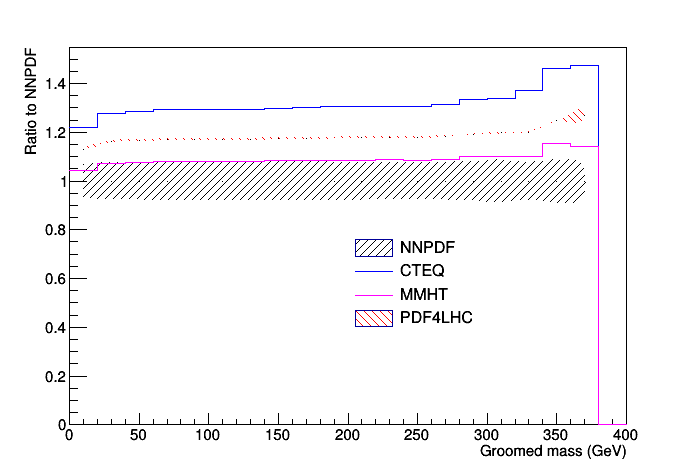

In [17]:
c2 = ROOT.TCanvas("c2", "c2")
nnpdf.SetFillColor(1)
pdf4lhc.SetFillColor(2)
nnpdf.SetFillStyle(3004)
pdf4lhc.SetFillStyle(3005)

cteq.SetLineColor(4)
mstw.SetLineColor(6)

s = ROOT.THStack("s",";Groomed mass (GeV);Ratio to NNPDF")
s.Add(nnpdf, 'e6')
s.Add(pdf4lhc, 'e6')
s.Add(cteq, 'hist')
s.Add(mstw, 'hist')

s.Draw('nostack')

leg = ROOT.TLegend(0.5, 0.3, 0.8, 0.5)
leg.SetBorderSize(0)
leg.SetFillColor(0)
leg.AddEntry(nnpdf, 'NNPDF', 'f')
leg.AddEntry(cteq, 'CTEQ', 'l')
leg.AddEntry(mstw, 'MMHT', 'l')
leg.AddEntry(pdf4lhc, 'PDF4LHC', 'f')
leg.Draw()
c2.Draw()
c2.Print('pdf_uncertainties_investigation.pdf', 'pdf')
c2.Print('pdf_uncertainties_investigation.png', 'png')